Stephany Nunez Martinez

# Activity 08a - Unsupervised Machine Learning (Dimensionality Reduction)

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE

In [3]:
hotel_data = pd.read_csv('hotel_bookings_sample.csv')
hotel_data.head()

,Canceled,BookingLeadTime,CustomerType,BookingChannel,AdvancePaymentStatus,LengthOfStay,NumberOfAdults,NumberOfChildren,RoomTypeBooked,RoomTypeAssigned,...,CancellationPolicyStringency,GuestLoyaltyProgramMembership,LengthOfStayLastVisit,CompetingHotelPrice,PaymentMethod,MarketSegment,IsolatedHolidayPeriods,BookingCountryOfOrigin,TimeOfBooking,EventInDestinationArea
0,No,9,New,Direct,Paid,2,1,2,Standard,Deluxe,...,3,No,5,311.98,Third Party,Tour Operator,No,UK,5,No
1,Yes,42,New,Online,Paid,2,3,3,Deluxe,Suite,...,4,No,1,385.53,Debit Card,Business,No,UK,23,No
2,No,26,Returning,Travel Agent,Unpaid,6,1,2,Deluxe,Standard,...,2,No,1,271.80,Debit Card,Leisure,No,UK,7,No
3,Yes,57,Returning,Online,Paid,4,1,2,Suite,Suite,...,4,Yes,2,292.81,Third Party,Leisure,No,UK,2,No
4,Yes,44,Returning,Direct,Unpaid,6,2,2,Deluxe,Deluxe,...,1,No,3,377.53,Credit Card,Business,No,US,3,Yes


### You're thinking about doing a dimensionality reduction. 
### Perform a principal components analysis. How many components will you need to retain 80% of the variability? Post a data visualization of the first two principal components.

In [6]:
y_var = "Canceled" # creating a var to hold column name
y = hotel_data[y_var] # making a var to hold the y_var name to call the column
X = hotel_data.drop(y_var, axis=1) # this new X var to hold features
X = pd.get_dummies(X, drop_first=True, dtype=int) # transform features to dummy vars
X = StandardScaler().fit_transform(X)  # fit and transform data
X

array([[-1.28333865, -1.10436722, -0.90102767, ...,  1.98758523,
        -0.51666759, -0.65558902],
       [ 0.30371373, -1.10436722,  0.60772597, ...,  1.98758523,
        -0.51666759, -0.65558902],
       [-0.46576621,  0.66071404, -0.90102767, ...,  1.98758523,
        -0.51666759, -0.65558902],
       ...,
       [ 1.12128617,  0.66071404, -0.90102767, ..., -0.50312308,
        -0.51666759, -0.65558902],
       [ 0.83273119,  1.54325467,  0.60772597, ..., -0.50312308,
        -0.51666759, -0.65558902],
       [-1.71617112, -1.54563753, -0.14665085, ..., -0.50312308,
        -0.51666759, -0.65558902]])

In [8]:
pca = PCA(n_components=0.80)
princomp = pca.fit_transform(X)
prinDf = pd.DataFrame(princomp)
pca_comp2 = pd.concat([prinDf, y], axis = 1)

In [9]:
pca_comp2

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,Canceled
0,-0.247379,0.234316,-0.023129,-0.288568,2.690415,0.562018,0.051186,-2.328857,0.529119,-0.989472,...,-0.125986,-0.004564,-0.071963,-0.567809,-0.644493,-1.093670,0.382483,0.035620,-1.341574,No
1,-1.512773,-0.389407,-1.721673,1.275248,-0.823652,-0.588380,1.709034,-0.752962,-0.313139,-1.304028,...,-1.467904,-0.589359,-1.968395,-0.104307,-0.367147,-0.704939,0.009827,0.665069,0.051494,Yes
2,2.607390,0.885903,-0.132601,0.497646,-1.292526,-1.572621,-1.583099,-0.533871,-0.429941,-0.945733,...,-0.555887,1.525386,-0.418806,0.400943,0.246406,-0.076162,-0.214121,-1.563507,-0.132173,No
3,-2.310834,1.252623,1.488839,0.358023,-0.869276,-0.581475,1.452963,-1.084668,-0.605209,-2.214514,...,-2.029491,-0.466112,0.234221,-0.092018,2.173184,0.608187,0.439339,0.498401,0.740044,Yes
4,-0.049745,-0.060960,0.069302,-0.139947,-0.204576,-0.218349,-0.308895,1.577805,1.738221,0.011850,...,-0.346007,1.189889,0.760578,-1.031649,-0.426334,0.181305,-1.088436,-0.877993,0.226139,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.184812,-0.056350,0.161972,0.133661,-0.273828,1.567812,0.084283,0.496779,0.807028,-0.217621,...,0.550996,-1.282698,-0.501908,0.056899,0.059462,-1.141081,-0.424307,0.808736,1.417526,No
9996,1.303490,-0.918730,-0.126727,-0.976979,-1.932881,-0.344782,-1.628710,1.473117,-1.579820,-0.752623,...,-0.006987,-0.813669,-0.205600,-1.952212,-0.480686,-0.709969,-1.597006,-0.013651,-1.638402,Yes
9997,0.343694,0.751280,2.172849,-1.302526,-1.176469,-0.664108,0.620704,-0.929992,-0.878875,1.750729,...,0.474474,-0.191148,0.081426,-1.037358,-1.363876,-1.654430,1.083497,1.031385,0.246496,No
9998,-1.604546,0.850050,-1.374825,0.722066,0.608682,0.544227,0.068706,-0.156416,-0.830513,1.070000,...,0.090779,1.248199,0.833839,0.203485,-0.839479,-0.184269,0.286602,1.292793,2.058025,No


In [11]:
# to find how many features are needed and initial amount of features
print("The number of features intitally:", X.shape[1])
print("The number of features need for 80% variability:", pca.n_components_)
print("The total variance explained by the created features:", round(pca.explained_variance_ratio_.sum()*100,2), '%')

The number of features intitally: 45
The number of features need for 80% variability: 31
The total variance explained by the created features: 80.5 %


<Axes: xlabel='0', ylabel='1'>

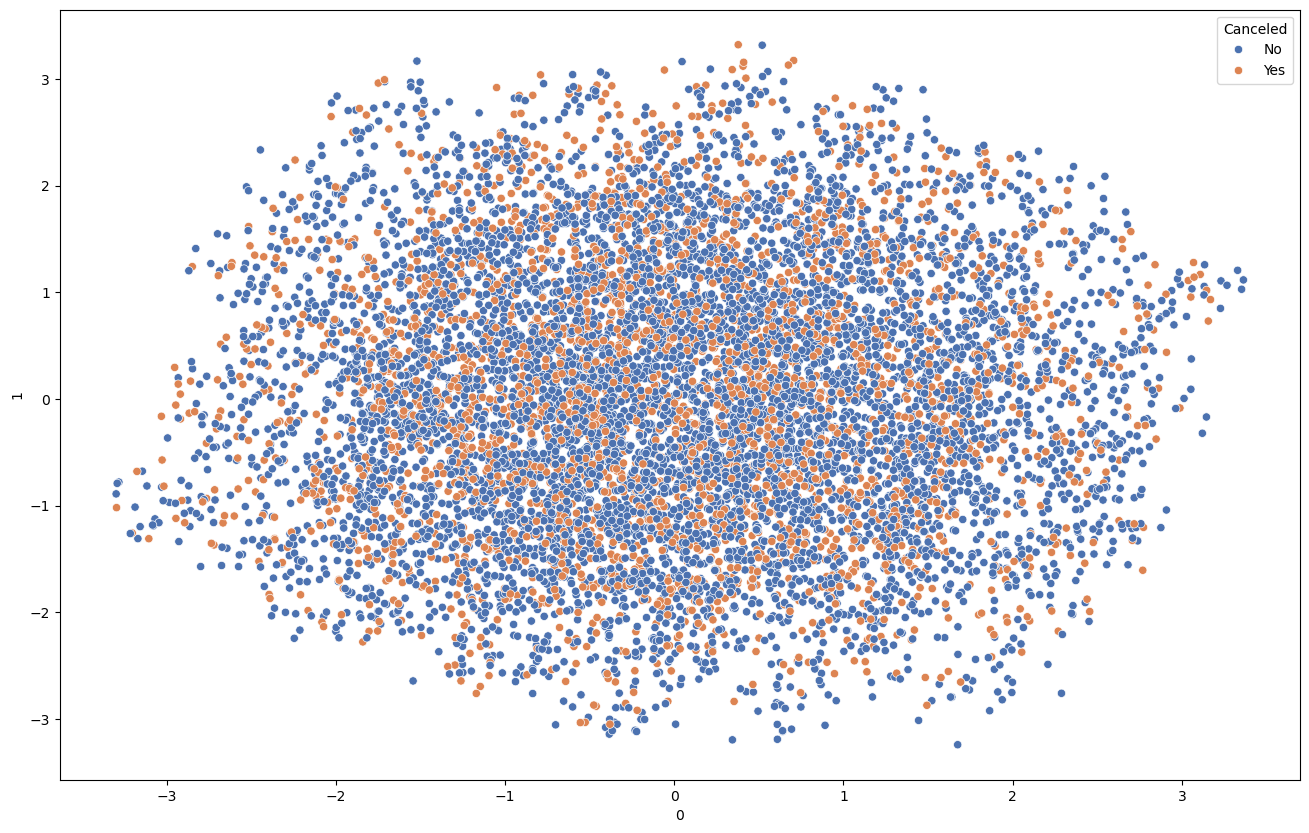

In [13]:
# creating the scatterplot for the first two principal components
num_labels = len(y.unique())
plt.figure(figsize=(16,10))
sns.scatterplot(x=0, y=1, hue=y_var, palette=sns.color_palette("deep", num_labels),
                data = pca_comp2, legend="full")

### You are wondering if the features you currently have would be able to distinguish between cancellations and non-cancellations.

### Create a t-SNE visualization of features used to predict hotel room cancellations. Paste a screenshot of your visualization. What is your interpretation of this figure? (try your best)

In [18]:
# t-SNE calcualtions
tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=300)
t_Df = pd.DataFrame(tsne.fit_transform(princomp))
t_result = pd.concat([t_Df, y], axis =1)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.001s...
[t-SNE] Computed neighbors for 10000 samples in 0.342s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.891839
[t-SNE] KL divergence after 50 iterations with early exaggeration: 93.629257
[t-SNE] KL divergence after 300 iterations: 3.060390


In [17]:
t_result.head()

,0,1,2,Canceled
0,6.858778,-12.466026,-3.701007,No
1,10.112383,10.873521,3.059845,Yes
2,5.677494,4.495793,5.281092,No
3,-4.254204,-12.398880,-3.435256,Yes
4,-2.645296,-4.781259,-7.688417,Yes


<Axes: xlabel='0', ylabel='1'>

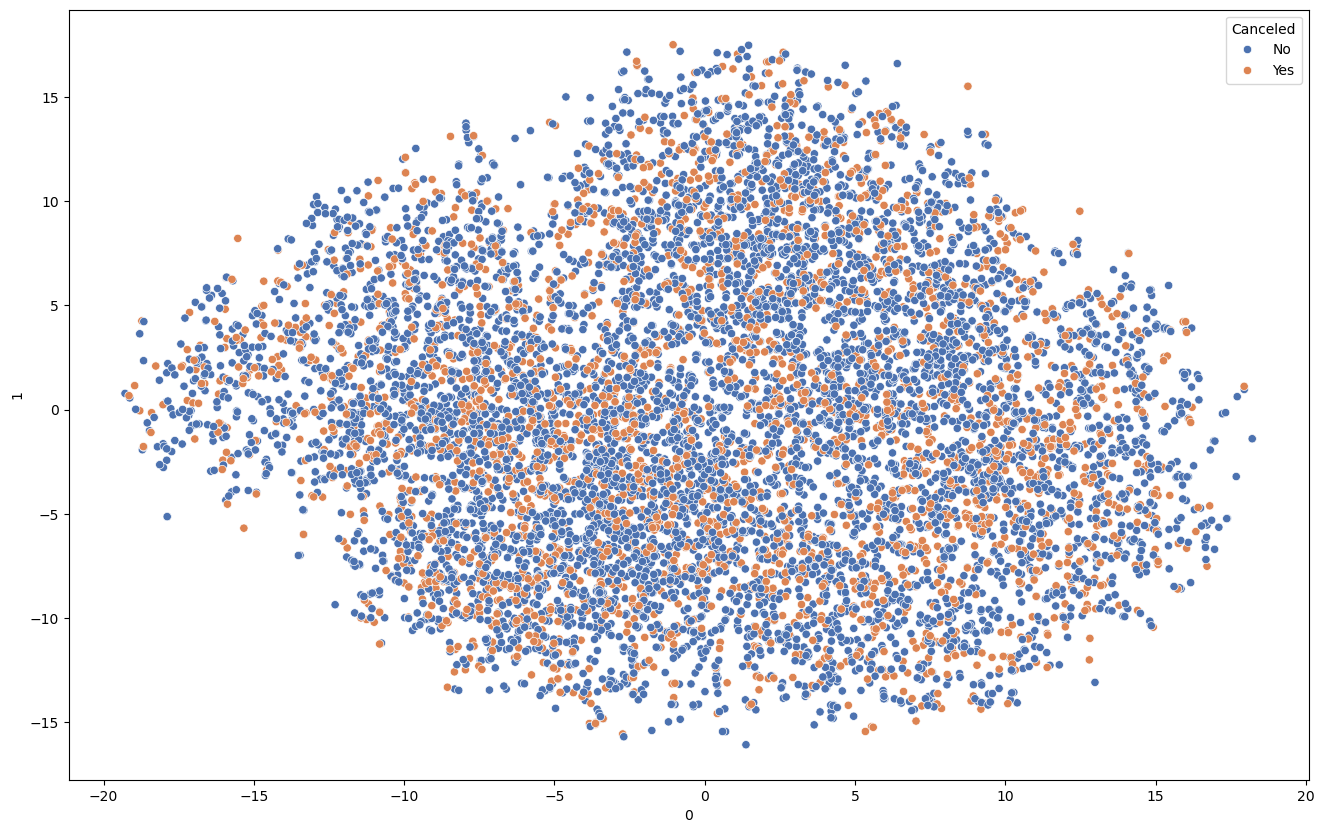

In [19]:
# plotting the features
plt.figure(figsize=(16,10))
sns.scatterplot(x=0, y=1, hue=y_var, palette=sns.color_palette("deep", num_labels),
                data=t_result, legend="full")

My interpretation of the visualization is that it does want to form two separated clusters but the overlapping is happening over the entirety of the two features. These two features may not be suited to predict if an individual will cancel or not cancel. It can also mean that the features may not be suited to each other due to complexity. 